# Plot of wind speed and solar irradiation data

## Reading the data

In [1]:
import pandas as pd
import matplotlib.pyplot as plt
import matplotlib.dates as mdates
import matplotlib as mpl
import numpy as np
import seaborn as sns
from datetime import datetime
from plot_parameters import *

#import only second sheet
df = pd.read_excel('new_format-2020 (3).xlsx', sheet_name='SupIm')
df['date'] = pd.date_range(start='1/1/2020', periods=len(df), freq='H')
df = df.set_index('date')

#view DataFrame: all the data
#print(df)

#view DataFrame head: some elements of the data
#print(df.head)
#print(list(df))

#view columns
#print(df.columns)

# column names
label = ['South West', 'South East', 'Greater London']
wind_column = ['SouthWest.Wind (m/s)','SouthEast.Wind (m/s)','GreaterLondon.Wind (m/s)']
solar_column = ['SouthWest.Solar (kJ/m2)','SouthEast.Solar (kJ/m2)','GreaterLondon.Solar (kJ/m2)']


## Computing hourly distribution
_**Not needed as seaborn does the mean automatically**_

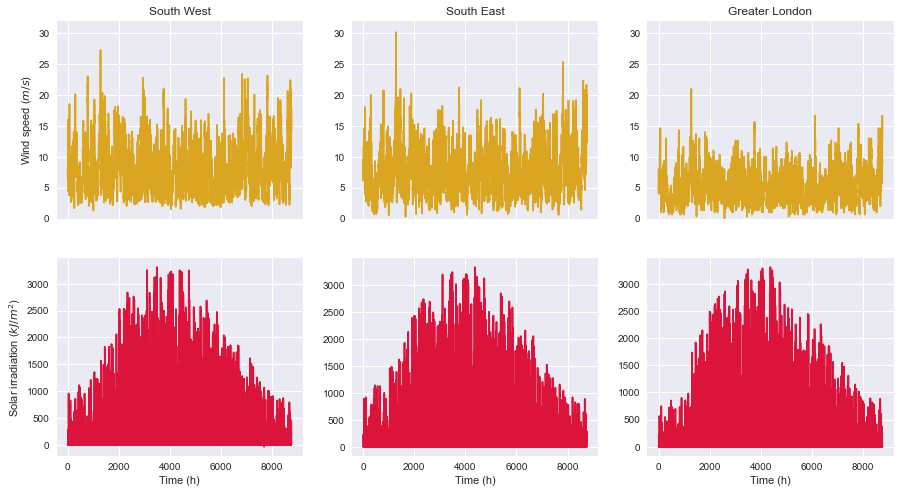

In [2]:
mpl.style.use('seaborn')
#Plot daily average
fig,ax =  plt.subplots(2,3,figsize=(15,8), sharex=True)
#x_ticks = pd.date_range(start='01/01/2020', end='12/31/2020', freq='3MS')
for i in [0,1,2]:
    axx = ax[0][i]
    x = df['t']
    y = df[wind_column[i]]
    axx.plot(x, y,label=label[i],color=wind_color)
    if i == 0:
        axx.set_ylabel(wind_label)
    axx.set_ylim(0,32)
    axx.title.set_text(label[i])
for i in [0,1,2]:
    axx = ax[1][i]
    x = df['t']
    y = df[solar_column[i]]
    axx.plot(x,y,label=label[i],color=solar_color)
    if i == 0:
        axx.set_ylabel(solar_label)
    axx.set_xlabel('Time (h)')
#fig.suptitle('Hourly wind speed and solar irradiation', fontsize=16) 
plt.savefig("raw_data_hourly_wind_speed_solar_irradiation.png")

Text(0.5, 0.98, 'Hourly distributions of wind speed and solar irradiation')

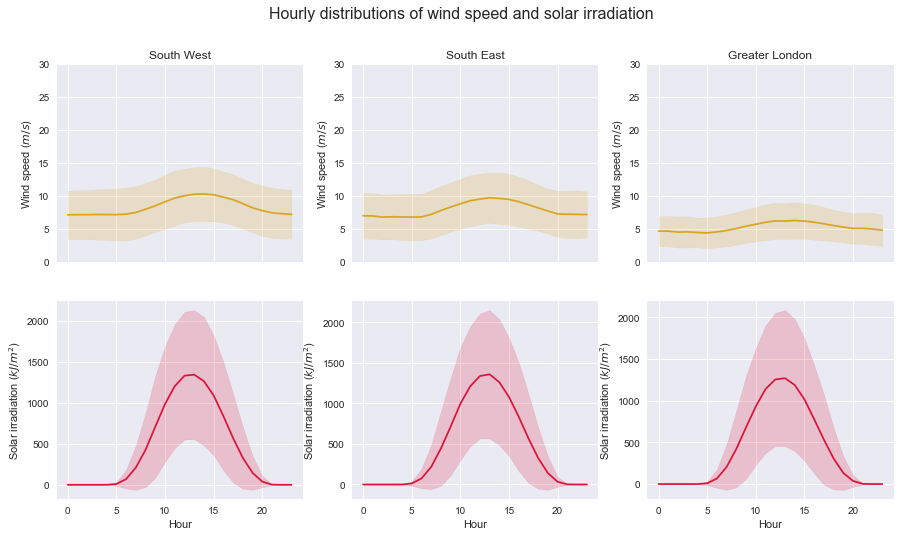

In [3]:
#create figure, and axes
mpl.style.use('seaborn')
fig,ax =  plt.subplots(2,3,figsize=(15,8), sharex=True)

for i in [0,1,2]:
    y=df[wind_column[i]]
    x=df.index.hour
    ax[0][i].set_ylabel(wind_label)
    ax[0][i].set_ylim(0,30)
    sns.lineplot(ax=ax[0][i], x=x, y=y,ci='sd',color=wind_color) #shade mean±std
    #ax[0][i].scatter(x=x, y=y, marker='.',color=wind_color)
    ax[0][i].title.set_text(label[i])
for i in [0,1,2]:
    y=df[solar_column[i]]
    x=df.index.hour
    ax[1][i].set_ylabel(solar_label)
    ax[1][i].set_xlabel('Hour')
    sns.lineplot(ax=ax[1][i], x=x, y=y,ci='sd',color=solar_color)
    #ax[1][i].scatter(x=x, y=y, marker='.',color=solar_color)
fig.suptitle('Hourly distributions of wind speed and solar irradiation', fontsize=16) 

In [1]:
from plot_parameters import *
print(solar_color)

green
